## Full code At a glance, without going into theory ..

```
!pip install kaggle

# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# importing the dog vs cat dataset from kaggle

# kaggle api
!kaggle competitions download -c dogs-vs-cats

# extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip: # just file open thing
    zip.extractall()

print("The dataset is extracted")


import os
# counting the number of files/images in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("number of images ",file_count)

number of images  25000

# printing the name of images

file_names = os.listdir('/content/train/')
print(file_names)

# dog and cat are present in the same follder(train)

['cat.8615.jpg', 'dog.10939.jpg', 'dog.3833.jpg', 'cat.5776.jpg', .... ]

# displaying dog images

img = mpimg.imread('/content/train/dog.3833.jpg')
plt.imshow(img)








# resizing all the images, also 25000 images hain : use less 2000, transfer learning me esa hi krte hain

file_names = os.listdir('/content/train')

for i in range(5): # first 5 files will be printed
   # print(file_names[i])
   name = file_names[i]
   print(name[0:3])

cat
dog
dog
cat
dog
file_names = os.listdir('/content/train')

# calculating how many dog and how many cat images are there
   dog_count=0
   cat_count=0

for img_file in file_names:
   name = img_file[0:3] # first 3 letters
     if name == 'dog':
        dog_count+=1

     else :
        cat_count+=1

print("Number of dog images ",dog_count)
print("Number of cat images ",cat_count)

Number of dog images  12500
Number of cat images  12500
original_folder = '/content/train'
resized_folder = '/content/image resized'

for i in range(2000): # first 2000 image se model train krenge
    filename = os.listdir(original_folder)[i] # ek ek krke first 2000 image it will take their names
    # os.listdir(original_folder) : this is like an array, actually a list
    img_path = original_folder + '/' + filename # after addition/concatenation, it will be /content/train/dog.444.jpg ; original_folder variable is just '/content/train' ; so '/' + 'filename' ko add krna must tha

# below two lines are are just for open krke risize krna, open is compulsory to do modifications
    img = Image.open(img_path)
    img = img.resize((224,224))

    img = img.convert('RGB') # some images can be graystyle, just to get rid of that suspicion, actually rgb hi hain, kuch shayad rgb na hon, isliye ye line of code likhna pda

# same as above , resized_folder = '/content/image resized' so '/' and 'image name' add krna must hai.
# these below two lines are just to save that image; folder jisme image save krna hai + image name
    newImgPath = resized_folder+'/'+filename
    img.save(newImgPath)

# it should be better to define those two paths at staring like this, usime / last me add kr do
# original_folder = '/content/train/'
# resized_folder = '/content/image resized/'
# so in that case +'/'+ extra add nhi krna padega, img_path = original_folder + filename , newImgPath = resized_folder+filename , as already folder variable name contains '/'

# printing the name of images that have been resized

file_names = os.listdir('/content/image resized/')
print(file_names)

['cat.8615.jpg', 'dog.10939.jpg', 'dog.3833.jpg', 'cat.5776.jpg', 'dog.11229.jpg', .... ]

# creating a loop to assign labels

filenames = os.listdir('/content/image resized/')
labels = []
for i in range(2000):
    file_name = filenames[i]
    label = file_name[0:3]

    if label == 'dog':
        labels.append(1)

    else :
        labels.append(0)

print(filenames[0:5])
print(len(filenames))
['cat.8615.jpg', 'dog.10939.jpg', 'dog.3833.jpg', 'cat.5776.jpg', 'dog.11229.jpg']
2000
print(labels[0:5])
print(len(labels))
[0, 1, 1, 0, 1]
2000
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)  = [0 1]
print(counts) = [ 978 1022]
# so distribution is almost even, and are completely random, as it is clear by printing the first 5 labels
Converting all the resized images to numpy arrays

import cv2
import glob

# Define the directory path where the images are located
image_directory = '/content/image resized/' # copy krne se '/' nhi aata, khud se add kr do

# Define a list of image file extensions to search for
image_extension = ['png', 'jpg']

# Initialize an empty list to store the file paths of the images
files = []

# Find image files with specified extensions and append their paths to the 'files' list
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

# Read and load the images into a NumPy array using OpenCV (cv2)
dog_cat_images = np.asarray([cv2.imread(file) for file in files]) # files me upasthit sbhi images ko cv2.imread() ke dvara numpy me badlna

dog_cat_images # this is now numpy array
# all the pixels values it has

type(dog_cat_images)
numpy.ndarray

print(dog_cat_images.shape) # 2000 images, 224*224 pixels , 3 channels in each i.e. rgb images
(2000, 224, 224, 3)

Reading from right to left:

If we try to lok at it directly : We will able to see its last two dimensionas that is 224 x 3 size matrix we can see. similarly 224 such 2D arrays of size (224 x 3) are there. These 224 such (224 x 3) 2D arrays will make 1 3D array. This one 3D array will be one image out of all the 2000 images we have selected.

Reading from left to right :

There will be such 2000 3D arrays(inside 1 4D array). Each of the 3D array represents 1 RGB image. The shape of each 3D array here is 224 x 224 x 3. So inside each 3D arrays, there are 224 2D arrays of shape 224 x 3. Going more deeper, inside each of the 224 2D arrays, there are 224 1D arrays of size 3.

dog_cat_images # this is now numpy array
# all the pixels values it has

[  [   [ [ 25,  26,  36],
         [ 20,  21,  31],
         [ 20,  18,  30],
         ...,
         [ 39,  67,  68],
         [ 76, 104, 105],
         [ 52,  80,  80] ],
          .
          .
          .

        [[255, 170, 239],
         [255, 166, 235],
         [253, 166, 234],
         ...,
         [255, 252, 255],
         [255, 252, 255],
         [255, 253, 255]]
                          ], -- 1st image : 224 * 224 * 3.


       [[[ 32,  53,  75], --- 2nd image started, similarly for 2000 images.
         [ 37,  58,  80],
         [ 35,  56,  77],
         ...,
         ...,
         [139, 135, 140],
         [125, 121, 126],
         [100,  96, 101]]],
          .
          .
          .


This is not ideal way for seeing. It should be 2000 x 3 x 224 x 224 :
Means 4D array of size 2000, in which each images are of shape 3 x 224 x 224,
So 3 pahle hone se, each channels are coming first, then pixel values in 2D array of 224 x 224 shape(correspomdong channel value)

Means 2000 images => For first images 3 channels => for each channels 224 x 224 shape 2D arrays.
Then it stores 2nd Image => again for this 2nd image 3 channels => for each channels 224 x 224 size 2D array.
Similary it stores for all the 2000 images.

X = dog_cat_images
Y = np.asarray(labels)

# train test split

x_train , x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2) # no need to stratify=Y, as almost same and random destribution

print(X.shape, x_train.shape, x_test.shape)
(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)

# scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

import tensorflow as tf
import tensorflow_hub as hub # to get pretrained model

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable = False)
num_of_classes = 2

model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.Dense(num_of_classes)
])

model.summary()

# it is just model loading, training to krna abhi baki hai. Ye model means number of hidden layers, nodes, activation functions etc are already defined. We don't need to think of that things.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
=================================================================
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
model.compile(

optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics = ['acc']
)

model.fit(x_train_scaled, y_train, epochs=5)

score, acc = model.evaluate(x_test_scaled,y_test)
print("Test Loss ",score)
print("Test Accuracy ",acc)

# almost 97% accuracy on test images prediction : so go

Maing predictive Systems
input_image_path = input('Path of the image to be predicted ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/225

input_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(input_reshaped)

input_pred_label = np.argmax(input_prediction) # to confidence values of both labels me se max will be picked

if(input_pred_label == 0) : print("CAT\n")
else : print("DOG")

# download images from internet and do the predictions
```

This code covers many key Python concepts and syntax elements, especially related to file handling, libraries like TensorFlow, and image processing with OpenCV. Let's break it down step by step:

### 1. **Package Installation and File Management Syntax**

```python
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
```
- `!`: The exclamation point at the beginning of a line in Jupyter Notebook allows you to run shell commands.
- `pip install`: Used to install Python packages.
- `mkdir -p`: Shell command to create a directory (`-p` ensures no error if the directory exists).
- `cp`: Copies files from one location to another.
- `chmod 600`: Changes file permissions to secure the `kaggle.json` file.

---

### 2. **File Download and Unzipping**

```python
!kaggle competitions download -c dogs-vs-cats
from zipfile import ZipFile

dataset = '/content/train.zip'
with ZipFile(dataset,'r') as zip:
    zip.extractall()
print("The dataset is extracted")
```
- `from zipfile import ZipFile`: This imports the `ZipFile` class from Python's built-in `zipfile` module for handling ZIP files.
- `with ZipFile(dataset,'r') as zip:`: This uses Python's **context manager** (`with`) to open the ZIP file for reading (`'r'` mode).
- `zip.extractall()`: Extracts all files in the ZIP archive.

---

### 3. **Using `os` for Directory Management**

```python
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("number of images ", file_count)
```
- `import os`: The `os` module is used for interacting with the operating system.
- `os.walk('/content/train')`: Traverses directories. It returns a tuple with the current directory (`path`), subdirectories (`dirs`), and files (`files`).
- `len(files)`: Gets the count of files in the directory.

---

### 4. **Looping through File Names and String Slicing**

```python
file_names = os.listdir('/content/train')
for i in range(5):
    name = file_names[i]
    print(name[0:3])
```
- `os.listdir()`: Lists all files in the directory.
- `for i in range(5)`: Iterates over the first 5 elements of the `file_names` list.
- `name[0:3]`: This is **string slicing**, which extracts the first three characters from each filename (useful for determining if it's a "dog" or "cat" image).

---

### 5. **Basic Conditional Logic**

```python
dog_count = 0
cat_count = 0
for img_file in file_names:
    name = img_file[0:3]
    if name == 'dog':
        dog_count += 1
    else:
        cat_count += 1
print("Number of dog images ", dog_count)
print("Number of cat images ", cat_count)
```
- **Conditionals**: `if` and `else` allow decision-making.
- `+= 1`: This increments the count variables.

---

### 6. **Resizing and Saving Images Using PIL**

```python
from PIL import Image
for i in range(2000):
    filename = os.listdir(original_folder)[i]
    img_path = original_folder + '/' + filename
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    newImgPath = resized_folder + '/' + filename
    img.save(newImgPath)
```
- **PIL (Pillow)**: A Python library for image processing.
- `Image.open()`: Opens an image file.
- `img.resize((224,224))`: Resizes the image to 224x224 pixels.
- `img.convert('RGB')`: Converts the image to RGB format.
- `img.save()`: Saves the modified image.

---

### 7. **Creating Labels Based on File Names**

```python
filenames = os.listdir('/content/image resized/')
labels = []
for i in range(2000):
    file_name = filenames[i]
    label = file_name[0:3]
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)
```
- **List Initialization**: `labels = []` creates an empty list.
- `labels.append()`: Appends an element to the list.
- The label `1` is for dogs and `0` for cats.

---

### 8. **Counting Occurrences Using `np.unique()`**

```python
import numpy as np
values, counts = np.unique(labels, return_counts=True)
```
- **NumPy (`np`)**: A powerful library for numerical computations.
- `np.unique(labels, return_counts=True)`: Finds unique elements in the list `labels` and counts their occurrences. The argument `return_counts=True` returns both the unique values and their counts.

---

### 9. **Reading and Converting Images to Numpy Arrays**

```python
import cv2
import glob

image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']
files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])
```
- **OpenCV (`cv2`)**: A library for image processing.
- `glob.glob()`: Returns all file paths matching a specified pattern.
- `cv2.imread()`: Reads an image file into a NumPy array.
- `np.asarray()`: Converts a list to a NumPy array.

---

### 10. **Train-Test Split and Scaling**

```python
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

x_train_scaled = x_train / 255
x_test_scaled = x_test / 255
```
- `train_test_split()`: Splits data into training and testing sets.
- `test_size=0.2`: Specifies that 20% of the data will be used for testing.
- `x_train / 255`: Scales pixel values (which range from 0 to 255) to the range [0, 1].

---

### 11. **TensorFlow Model Creation and Compilation**

```python
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
```
- **TensorFlow (`tf`)**: A library for machine learning.
- **TensorFlow Hub**: Used to load pretrained models.
- `KerasLayer()`: Wraps a TensorFlow Hub module as a Keras layer.
- `model.compile()`: Specifies the optimizer (`'adam'`), loss function, and evaluation metrics.

---

### 12. **Model Training and Evaluation**

```python
model.fit(x_train_scaled, y_train, epochs=5)
score, acc = model.evaluate(x_test_scaled, y_test)
print("Test Loss ", score)
print("Test Accuracy ", acc)
```
- `model.fit()`: Trains the model with the training data for a specified number of epochs (5).
- `model.evaluate()`: Evaluates the model on the test data, returning the loss and accuracy.

---

### 13. **Making Predictions**

```python
input_image_path = input('Path of the image to be predicted ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224, 224))
input_image_scaled = input_image_resize / 255
input_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

input_prediction = model.predict(input_reshaped)
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 0:
    print("CAT")
else:
    print("DOG")
```
- `input()`: Reads a string from user input.
- `cv2_imshow()`: Displays an image (available in Jupyter Notebook/Colab).
- `np.reshape()`: Reshapes the image data into the required format.
- `model.predict()`: Predicts the class label for the input image.
- `np.argmax()`: Returns the index of the maximum value (used to get the predicted class).

---

This code covers a broad range of Python and deep learning concepts! You can explore each library (`os`, `cv2`, `tensorflow`, `sklearn`, etc.) further to deepen your understanding.

.

### **Little bit more clear using example**


Sure! I'll break down the code and provide examples with explanations.

---

### 1. **`!pip install kaggle`**
   - This command installs the `kaggle` package using the pip package manager. It allows you to download datasets and interact with the Kaggle API from your code.

**Example:**
```bash
!pip install numpy
```
Installs the `numpy` package.

---

### 2. **`!mkdir -p ~/.kaggle`**
   - `mkdir` is used to create directories. The `-p` option ensures that no error is raised if the directory already exists.

**Example:**
```bash
!mkdir -p /my/new/folder
```
Creates a directory `/my/new/folder`.

---

### 3. **`!cp kaggle.json ~/.kaggle/`**
   - This command copies the `kaggle.json` file (which contains your Kaggle API credentials) to the `.kaggle` directory.

**Example:**
```bash
!cp myfile.txt /newlocation/myfile.txt
```
Copies the `myfile.txt` to `/newlocation`.

---

### 4. **`!chmod 600 ~/.kaggle/kaggle.json`**
   - `chmod 600` changes the permissions of the `kaggle.json` file to make it readable and writable only by the user (600 means only the owner can read and write).

**Example:**
```bash
!chmod 644 myfile.txt
```
Sets the file `myfile.txt` to be readable by everyone, but writable only by the owner.

---

### 5. **`from zipfile import ZipFile`**
   - Imports the `ZipFile` class from the `zipfile` module, allowing you to work with `.zip` files.

**Example:**
```python
from zipfile import ZipFile

with ZipFile('sample.zip', 'r') as zip_ref:
    zip_ref.extractall()
```
Extracts the contents of `sample.zip`.

---

### 6. **`os.walk()`**
   - `os.walk()` generates file names in a directory tree by walking either top-down or bottom-up.

**Example:**
```python
import os

path, dirs, files = next(os.walk('/myfolder'))
print(files)  # Prints the list of files in the folder
```
Lists the files in `/myfolder`.

---

### 7. **`os.listdir()`**
   - Lists all the files in a directory.

**Example:**
```python
import os

files = os.listdir('/myfolder')
print(files)
```
Prints the list of files in `/myfolder`.

---

### 8. **`img = mpimg.imread('image.jpg')`**
   - Reads an image file into an array using `mpimg` (Matplotlib Image).

**Example:**
```python
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('image.jpg')
plt.imshow(img)
plt.show()
```
Displays the image `image.jpg`.

---

### 9. **`Image.open()`**
   - Opens an image file using the `Pillow` library.

**Example:**
```python
from PIL import Image

img = Image.open('image.jpg')
img.show()
```
Opens and displays an image.

---

### 10. **`img.resize()`**
   - Resizes an image to the specified dimensions.

**Example:**
```python
img_resized = img.resize((224, 224))
img_resized.show()
```
Resizes the image to 224x224 pixels.

---

### 11. **`img.convert('RGB')`**
   - Converts an image to RGB mode (if it's grayscale or any other format).

**Example:**
```python
img_rgb = img.convert('RGB')
img_rgb.show()
```
Converts the image to RGB.

---

### 12. **`np.asarray()`**
   - Converts a Python list (or any sequence) into a NumPy array.

**Example:**
```python
import numpy as np

list_data = [1, 2, 3, 4]
array_data = np.asarray(list_data)
print(array_data)
```
Converts a list into a NumPy array.

---

### 13. **`glob.glob()`**
   - Finds all the file paths that match a specified pattern.

**Example:**
```python
import glob

files = glob.glob('/myfolder/*.jpg')
print(files)  # Prints all jpg files in the folder
```
Finds all `.jpg` files in `/myfolder`.

---

### 14. **`cv2.imread()`**
   - Reads an image using OpenCV.

**Example:**
```python
import cv2

image = cv2.imread('image.jpg')
print(image.shape)  # Prints the dimensions of the image
```
Loads an image with OpenCV.

---

### 15. **`train_test_split()`**
   - Splits arrays or matrices into random train and test subsets.

**Example:**
```python
from sklearn.model_selection import train_test_split

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([0, 1, 0, 1])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(x_train, x_test)
```
Splits data into training and testing sets.

---

### 16. **`model = tf.keras.Sequential()`**
   - Creates a linear stack of layers in Keras.

**Example:**
```python
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
```
Defines a simple neural network with two dense layers.

---

### 17. **`model.compile()`**
   - Configures the model for training.

**Example:**
```python
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
```
Sets the optimizer, loss function, and metrics for the model.

---

### 18. **`model.fit()`**
   - Trains the model for a fixed number of epochs.

**Example:**
```python
model.fit(x_train, y_train, epochs=10)
```
Trains the model for 10 epochs.

---

### 19. **`model.evaluate()`**
   - Evaluates the model on the test data.

**Example:**
```python
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
```
Evaluates the model on `x_test` and `y_test`.

---

### 20. **`np.argmax()`**
   - Returns the index of the maximum value along an axis.

**Example:**
```python
import numpy as np

predictions = np.array([0.1, 0.9])
predicted_label = np.argmax(predictions)
print(predicted_label)  # Returns 1 (index of the highest value)
```
Returns the index of the maximum value in an array.

---

### 21. **`cv2.resize()`**
   - Resizes an image using OpenCV.

**Example:**
```python
resized_image = cv2.resize(image, (224, 224))
cv2.imshow('Resized Image', resized_image)
```
Resizes an image to 224x224.

---

This covers the main Python syntax and operations used in the code you've provided!

.

.

.

.

## **Now coming to modwl training after learning**

This Project is about building a Dog vs Cat classification system using Transfer Learning. Here we used the pre-trained model called MobileNet V2. Transfer Learning is an important concept in Deep Learning.

Transfer Learning gives higher accuracy compared to training moddel from scratch

![Siddhardhan - DL Project 3. Dog vs Cat Classification using Transfer Learning Deep Learning Projects in Python [pHq29zi4Gr0 - 1013x570 - 2m52s].png](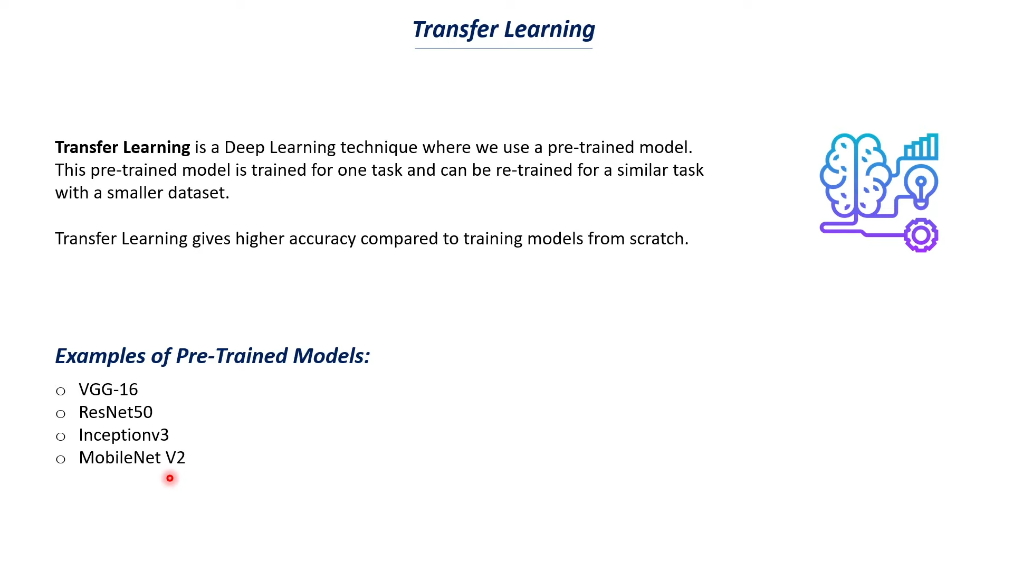)

![Siddhardhan - DL Project 3. Dog vs Cat Classification using Transfer Learning Deep Learning Projects in Python [pHq29zi4Gr0 - 743x418 - 4m25s].png](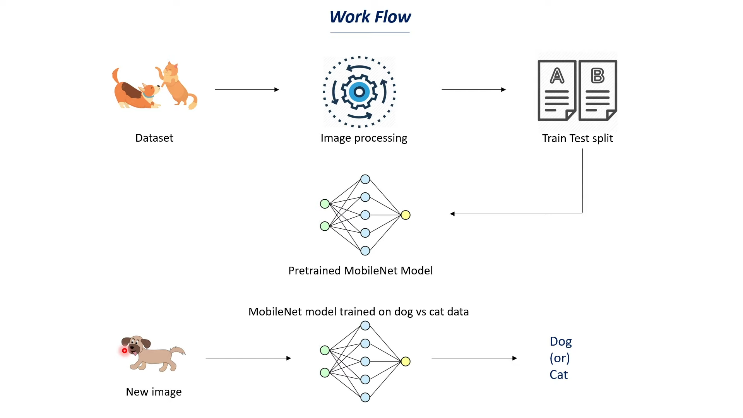)

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# importing the dog vs cat dataset from kaggle

In [4]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

 98% 798M/814M [00:11<00:00, 95.5MB/s]
100% 814M/814M [00:11<00:00, 71.5MB/s]


In [5]:
# extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/dogs-vs-cats-redux-kernels-edition.zip'

with ZipFile(dataset,'r') as zip:  # just file open thing
  zip.extractall()

print("The dataset is extracted")

The dataset is extracted


In [6]:
# extracting the compressed dataset

from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:  # just file open thing
  zip.extractall()

print("The dataset is extracted")

The dataset is extracted


In [7]:
import os
# counting the number of files/images in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("number of images ",file_count)

number of images  25000


In [8]:
# printing the name of images

file_names = os.listdir('/content/train/')
print(file_names[:5]) ## printing just 5, not all, for all just write print(file_names)

# dog and cat are present in the same follder(train)

['dog.8345.jpg', 'cat.68.jpg', 'cat.6274.jpg', 'dog.5407.jpg', 'cat.1964.jpg']


Importing the dependencies

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

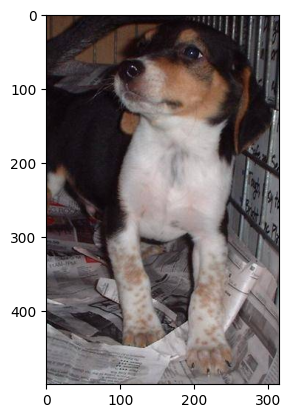

In [10]:
# displaying dog images

img = mpimg.imread('/content/train/dog.3833.jpg')
plt.imshow(img)


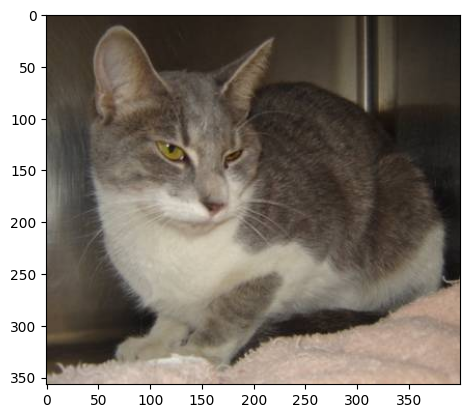

In [11]:
# displaying image of a cat
img = mpimg.imread('/content/train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

One thing is clear, images size are different in pixels. For training and testing the model, we should have some fixed size of image : first preprocessing tast.

Also cat and dog are differnt in shape, so color factor won't affect much, but still let's play with rgb, need not to convert in grayscale image

In [12]:
# common pixels sizes me badlna hai ab

import os

In [13]:
# resizing all the images, also 25000 images hain : use less 2000, transfer learning me esa hi krte hain

file_names = os.listdir('/content/train')

for i in range(5): # first 5 files will be printed
  # print(file_names[i])
  name = file_names[i]
  print(name[0:3])

dog
cat
cat
dog
cat


In [14]:
file_names = os.listdir('/content/train')

# calculating how many dog and how many cat images are there
dog_count=0
cat_count=0

for img_file in file_names:
  name = img_file[0:3] # first 3 letters
  if name == 'dog':
    dog_count+=1

  else :
    cat_count+=1

print("Number of dog images ",dog_count)
print("Number of cat images ",cat_count)


Number of dog images  12500
Number of cat images  12500


In [15]:
# exact 12 hajr 500 images
# we are going to take just 2000 or 3000 images not all

In [16]:
# creating a directory for resized images

In [17]:
os.mkdir('/content/image resized')

In [18]:
original_folder = '/content/train'
resized_folder = '/content/image resized'

for i in range(2000): # first 2000 image se model train krenge
  filename = os.listdir(original_folder)[i] # ek ek krke first 2000 image it will take their names
                                            #  os.listdir(original_folder) : this is like an array, actually a list
  img_path = original_folder + '/' + filename  # after addition/concatenation, it will be /content/train/dog.444.jpg ; original_folder variable is just  '/content/train' ; so '/' + 'filename' ko add krna must tha

  # below two lines are are just for open krke risize krna, open is compulsory to do modifications
  img = Image.open(img_path)
  img = img.resize((224,224))

  img = img.convert('RGB') # some images can be graystyle, just to get rid of that suspicion, actually rgb hi hain, kuch shayad rgb na hon, isliye ye line of code likhna pda

  # same as above ,  resized_folder = '/content/image resized' so '/' and 'image name' add krna must hai.
  # these below two lines are just to save that image; folder jisme image save krna hai + image name
  newImgPath = resized_folder+'/'+filename
  img.save(newImgPath)

  # it should be better to define those two paths at staring like this, usime / last me add kr do
#  original_folder = '/content/train/'
#  resized_folder = '/content/image resized/'
# so in that case +'/'+ extra add nhi krna padega, img_path = original_folder + filename , newImgPath = resized_folder+filename , as already folder variable name contains '/'

The code you provided appears to be Python code that performs the following tasks:

1. It creates a new directory called "image resized" under the `/content` directory using the `os.mkdir()` function.

2. It defines two variables:
   - `original_folder`, which specifies the directory where the original images are located.
   - `resized_folder`, which specifies the directory where the resized images will be saved.

3. It then enters a loop that iterates 2000 times. The purpose of this loop is to process the first 2000 images in the `original_folder`.

4. Within the loop, the code does the following for each iteration:
   - It constructs the filename of the current image by listing the files in the `original_folder` and selecting the `i`-th file.
   - It constructs the full path to the original image using the `original_folder` and the filename.
   - It opens the original image using the Python Imaging Library (PIL) with `Image.open()`.
   - It resizes the image to a size of 224x224 pixels using `img.resize((224, 224))`. This is a common size for images when working with deep learning models.
   - It converts the image to the RGB color mode using `img.convert('RGB')`. This is necessary because some images might be in different color modes, and converting to RGB ensures consistency.
   - It constructs the path where the resized image will be saved using `resized_folder` and the filename.
   - It saves the resized image to the specified path using `img.save(newImgPath)`.

Overall, this code is intended to resize and convert a specified number of images (the first 2000 images) from the `original_folder` to 224x224 pixels and save them in the "image resized" directory. This kind of preprocessing is common when preparing image data for machine learning or deep learning tasks.

In [19]:
# printing the name of images that have been resized

file_names = os.listdir('/content/image resized/')
print(file_names[:10])

['dog.8345.jpg', 'cat.68.jpg', 'cat.6274.jpg', 'dog.5407.jpg', 'cat.1964.jpg', 'dog.12499.jpg', 'dog.4834.jpg', 'dog.7854.jpg', 'dog.4450.jpg', 'dog.7342.jpg']


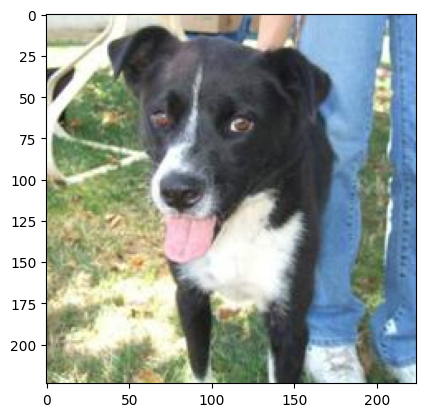

In [20]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.8345.jpg')
imgplt = plt.imshow(img)
plt.show()

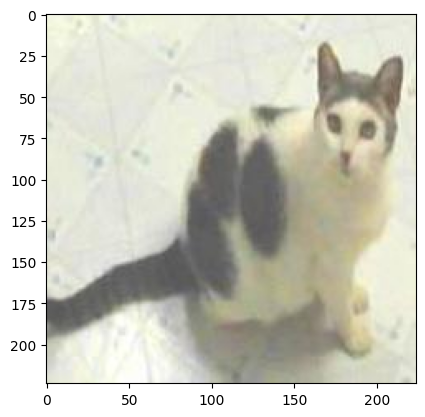

In [21]:
# displaying the resized cat image
img=mpimg.imread('/content/image resized/cat.68.jpg')
plt.imshow(img)

Creating labels for resized images of dogs and cats

In [22]:
# creating a loop to assign labels

filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else :
    labels.append(0)

In [23]:
print(filenames[0:5])
print(len(filenames))

['dog.8345.jpg', 'cat.68.jpg', 'cat.6274.jpg', 'dog.5407.jpg', 'cat.1964.jpg']
2000


In [24]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 1, 0]
2000


In [25]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)
# so distribution is almost even, and are completely random, as it is clear by printing the first 5 labels

[0 1]
[1008  992]


Converting all the resized images to numpy arrays


In [26]:
import cv2
import glob

In [27]:
# Define the directory path where the images are located
image_directory = '/content/image resized/'   # copy krne se '/' nhi aata, khud se add kr do

# Define a list of image file extensions to search for
image_extension = ['png', 'jpg']

# Initialize an empty list to store the file paths of the images
files = []

# Find image files with specified extensions and append their paths to the 'files' list
## Glob used for png or jpg jo bhi formate mile un dono ko use kr lo
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

# Read and load the images into a NumPy array using OpenCV (cv2)
dog_cat_images = np.asarray([cv2.imread(file) for file in files]) # files me upasthit sbhi images ko cv2.imread() ke dvara numpy me badlna


The provided code appears to perform the following tasks:

1. `image_directory = '/content/image resized/'`: This line defines the directory path where the images are located. The trailing '/' is added to ensure that the path ends with a slash for proper file path concatenation.

2. `image_extension = ['png', 'jpg']`: This line defines a list of image file extensions to search for within the specified directory. The code will look for files with '.png' and '.jpg' extensions.

3. `files = []`: This line initializes an empty list called `files` that will be used to store the file paths of the images found in the directory.

4. `[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]`: This line uses a list comprehension to **find image files in the specified `image_directory` with extensions specified in `image_extension`**. Here's a breakdown of what this line does:
   - `glob.glob(image_directory + '*.' + e)` generates a list of file paths that match the pattern `'image_directory/*.extension'` for each extension `e` in the `image_extension` list.
   - The `files.extend(...)` part appends the file paths found for each extension to the `files` list.

5. `dog_cat_images = np.asarray([cv2.imread(file) for file in files])`: This line reads the image files specified in the `files` list using the OpenCV (cv2) library and stores the resulting images as a NumPy array in the `dog_cat_images` variable. Each element of the array corresponds to an image file, and `cv2.imread(file)` is used to read and load each image from the file path.

In summary, this code scans the specified directory (`image_directory`) for image files with specific extensions ('.png' and '.jpg') and loads those images into a NumPy array (`dog_cat_images`) using the OpenCV library. The code effectively collects and prepares image data for further processing or analysis.

In [28]:
type(dog_cat_images)

numpy.ndarray

In [29]:
print(dog_cat_images.shape) # 2000 images, 224*224 pixels , 3 channels in each i.e. rgb images

(2000, 224, 224, 3)


In [30]:
X = dog_cat_images
Y = np.asarray(labels)

In [31]:
# train test split

x_train , x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=2) # no need to stratify=Y, as almost same and random destribution

In [32]:
print(X.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 -> training images

400 -> testing images

not a typical deep learning model. as deep = 100,000 kind of datapoints


In [33]:
# scaling the data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

**BUILDING THE NEURAL NETWORK**

In [34]:
import tensorflow as tf
import keras
# import tensorflow_hub as hub # to get pretrained model : we can no longer use it, since tensorflow hub is incompatible with latest keras .
# We need to look for alternatives for getting pretrained models.

In [42]:
import keras
from keras.applications import MobileNetV2
from keras.layers import Dense, Flatten
from keras.models import Model
from keras import Input

# Define the input shape
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)

# Load MobileNetV2 with pre-trained weights, excluding the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape = input_shape)

# Pass the inputs through the base model
x = base_model(inputs)

# Flatten the output from MobileNetV2
x = Flatten()(x)

# Add a Dense layer for binary classification
outputs = Dense(2, activation='softmax')(x)

# Define the model with inputs and outputs
model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │         125,442 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,383,426 (9.09 MB)

 Trainable params: 2,349,314 (8.96 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [51]:
import keras
from keras.applications import MobileNetV2
from keras.layers import Dense, Flatten
from keras.models import Model
from keras import Input

# Define the input shape
input_shape = (224, 224, 3)
inputs = Input(shape = input_shape)  # Define the input layer explicitly

# Load MobileNetV2 with pre-trained weights, excluding the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top = False, input_shape = input_shape)

# Pass the input through the base model
x = base_model(inputs)

# Flatten the 4D output of MobileNetV2 to 2D
x = Flatten()(x)

# Add a Dense layer for binary classification
outputs = Dense(2, activation = 'softmax')(x)

# Define the model with inputs and outputs
model = Model(inputs = inputs, outputs = outputs)

# Print the model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │         125,442 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,383,426 (9.09 MB)

 Trainable params: 2,349,314 (8.96 MB)

 Non-trainable params: 34,112 (133.25 KB)

To modify your Sequential model without using the add() function, you can pass the layers directly as a list when defining the model. This allows you to avoid calling add() for each layer and instead specify all layers at once when initializing the Sequential() model.

Here's how you can modify your code to use MobileNetV2 without add():

In [52]:
from keras.applications import MobileNetV2
from keras.layers import Dense
from keras.models import Model
from keras import Input

# Define the input shape
input_shape = (224, 224, 3)
inputs = Input(shape = input_shape)  # Define the input layer explicitly

# Load MobileNetV2 with pre-trained weights, excluding the top classification layer
base_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = input_shape)

# Pass the input through the base model
x = base_model(inputs)

# Add a Dense layer for binary classification
outputs = Dense(2)(x)

# Define the model with inputs and outputs
model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 7, 7, 2)             │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,226,434 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

To add a softmax activation to the output layer, you can simply pass the activation='softmax' argument to the Dense layer. This will ensure that the output is transformed into probabilities for multi-class classification (or binary classification with more interpretable outputs).

In [55]:
from keras.applications import MobileNetV2
from keras.layers import Dense
from keras.models import Model
from keras import Input

# Define the input shape
input_shape = (224, 224, 3)
inputs = Input(shape = input_shape)  # Define the input layer explicitly

# Load MobileNetV2 with pre-trained weights, excluding the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top = False, input_shape=input_shape)

# Pass the input through the base model
x = base_model(inputs)

# Add a Dense layer for binary classification with softmax activation
outputs = Dense(2, activation = 'softmax')(x)

# Define the model with inputs and outputs
model = Model(inputs = inputs, outputs = outputs)

# Print the model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 7, 7, 2)             │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,226,434 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

The code snippet you provided appears to define a neural network model using Keras, a popular deep learning framework. This model is a sequential model with two layers. Let's break down the components of this model summary:

1. **Model Type**: "sequential" refers to the type of Keras model being used. A sequential model is a linear stack of layers, where you can add layers one by one, and the data flows through the layers sequentially.

2. **Layer 1: KerasLayer (keras_layer)**:
   - This is a KerasLayer, which indicates that this layer is using pre-trained weights from a model provided by TensorFlow Hub. It's a type of transfer learning where you can leverage pre-trained models for feature extraction.
   - The output shape of this layer is (None, 1280). The 'None' indicates that the batch size can vary.
   - The number of parameters for this layer is 2,257,984.

3. **Layer 2: Dense (dense)**:
   - This is a dense (fully connected) layer, which is typically used for making predictions or classifications.
   - The output shape of this layer is (None, 2), indicating that it produces a 2-dimensional output.
   - The number of parameters for this layer is 2,562.

In summary, this model consists of two layers:

- The first layer, "keras_layer," is based on a pre-trained model and extracts features, producing an output of shape (None, 1280).
- The second layer, "dense," is a dense layer used for classification and produces an output of shape (None, 2).

This architecture is commonly used for transfer learning. The features extracted by the pre-trained model (keras_layer) are passed to the dense layer for classification. The total number of parameters in the model is determined by the weights in the dense layer (2,562) and the weights in the pre-trained model (2,257,984).


Adding more dense layers, you can add 2-3 more dense layers between the pre-trained model (MobileNetV2) and the final output layer in the Sequential model. You can use Dense layers with activation functions like ReLU or others (e.g., sigmoid, tanh) before the final softmax output.

In [57]:
from keras.applications import MobileNetV2
from keras.layers import Dense, Flatten
from keras.models import Model
from keras import Input

# Define the input shape
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)  # Define the input layer explicitly

# Load MobileNetV2 with pre-trained weights, excluding the top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Pass the input through the base model
x = base_model(inputs)

# Flatten the output of MobileNetV2
x = Flatten()(x)

# Add Dense layers with ReLU activation
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# Add the final Dense layer for binary classification with softmax activation
outputs = Dense(2, activation='softmax')(x)

# Define the model with inputs and outputs
model = Model(inputs=inputs, outputs=outputs)

# Print the model summary
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 62720)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │      16,056,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,355,842 (70.02 MB)

 Trainable params: 18,321,730 (69.89 MB)

 Non-trainable params: 34,112 (133.25 KB)

The values 7, 7, and 1280 come from the output of the MobileNetV2 model after processing an input image.

**How input and output nodes are being managed above**

Keep aside the output of pretrained model. It is giving 7 x 7 x 1280 size multidimentional output taking our images(224 x 224) input. Now flattten layer converts this multidimentional output into single dimention 1D vector. Next what is happening

In the model you shared, the first Dense layer is transitioning from a high-dimensional output (7x7x1280 nodes) to a much smaller one (256 nodes). Here's a basic breakdown of what's happening:

1. **Input to the Dense Layer:**
   - The MobileNetV2 model outputs a feature map of size **(7, 7, 1280)**. This is a 3D tensor (7x7 grid with 1280 channels of features per grid point).
   
2. **Flatten Layer:**
   - The Flatten layer converts this 3D output into a 1D vector. So, the **7x7x1280** becomes **62720** (7 * 7 * 1280 = 62720).
   
3. **First Dense Layer:**
   - The first Dense layer takes this vector (62720 elements) and applies a transformation using weights. This transformation reduces the 62720 elements down to **256 output nodes**.
   - Inside the Dense layer:
     - Each of the 62720 inputs is connected to each of the 256 output nodes.
     - The layer learns weights and biases during training to find the most important features.
     - After combining the inputs through a weighted sum, it applies the **ReLU activation function** to introduce non-linearity.

In simple terms, **the Dense layer is learning to compress the important information from a large input (62720 elements) into a smaller, more manageable output (256 elements)**, which is crucial for reducing the complexity of the model and focusing on the most important patterns.

Let's go through each of the remaining Dense layers step-by-step, just like the first one:

### 1. **Second Dense Layer:**  Dense(128, activation='relu')
   - **Input:** The first Dense layer outputs **256 nodes**.
   - **Transition:** The second Dense layer will now take those 256 nodes and further reduce them to **128 nodes**.
   - **What's happening:**
     - Each of the 256 input nodes is connected to each of the 128 output nodes.
     - The layer learns weights for these connections and applies the **ReLU activation function** again to introduce non-linearity.
     - This helps the model learn more complex relationships between the features.

### 2. **Third Dense Layer:** Dense(64, activation='relu')
   - **Input:** The second Dense layer outputs **128 nodes**.
   - **Transition:** The third Dense layer reduces these 128 nodes to **64 nodes**.
   - **What's happening:**
     - Similar to before, each of the 128 inputs is connected to each of the 64 outputs through learned weights.
     - It applies the **ReLU activation function** again, further refining the information and compressing it.
     - This reduces the dimensionality and focuses on essential features for classification.

### 3. **Fourth Dense Layer (Final Output Layer):** Dense(2, activation='softmax')
   - **Input:** The third Dense layer outputs **64 nodes**.
   - **Transition:** The final Dense layer reduces these 64 nodes down to just **2 nodes**.
   - **What's happening:**
     - Each of the 64 inputs is connected to 2 output nodes, but now we use **only 2 output nodes** because this is a **binary classification** task (likely two classes, e.g., "class 0" and "class 1").
     - Instead of the ReLU activation, a different activation (like **softmax** or **sigmoid**) is applied here to output probabilities (since it's a classification task). In your case, based on previous conversations, it is likely **sigmoid** for binary classification.

### Summary:
- Each Dense layer reduces the number of nodes step-by-step (256 → 128 → 64 → 2).
- These layers learn how to map high-dimensional inputs to smaller, more meaningful outputs.
- The network focuses on extracting and refining important features at each stage before making a final decision in the last layer.

The transitions compress and refine the learned features, moving from more detailed representations to a simple, clear decision boundary for classification.


**So dense layers hogh dimensional data ko low dimensional data me badal deti hain, by extracting important features.**

Adding convolution, max pooling etc layers as well

 Sequential model cannot handle the combination of the MobileNetV2 base model (which outputs a 4D tensor) followed by Conv2D and MaxPooling2D layers (which expect 4D tensors as input). The Sequential model is designed to handle layers in a straightforward, linear stack, but this stack must be compatible between layers.

In your case, MobileNetV2 is already a feature extractor and you can't add Conv2D and MaxPooling2D layers directly to its output. Instead, you should use the Functional API to build a model with the architecture you're aiming for. Here's how you can achieve this:



In [59]:
from keras.applications import MobileNetV2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras import Input

# Define the input shape
input_shape = (224, 224, 3)
inputs = Input(shape = input_shape)

# Load MobileNetV2 with pre-trained weights, excluding the top classification layer
base_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = input_shape)

# Pass the input through MobileNetV2
x = base_model(inputs)

# Add Convolutional and MaxPooling Layers on top of MobileNetV2 output
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)  # First Convolutional Layer with 64 filters
x = MaxPooling2D(pool_size=(2, 2))(x)  # First MaxPooling Layer

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)  # Second Convolutional Layer with 128 filters
x = MaxPooling2D(pool_size=(2, 2))(x)  # Second MaxPooling Layer

# Flatten the output before passing to Dense layers
x = Flatten()(x)

# Continue with Dense layers
x = Dense(256, activation='relu')(x)  # First Dense layer
x = Dense(128, activation='relu')(x)  # Second Dense layer
x = Dense(64, activation='relu')(x)   # Third Dense layer

# Final Dense layer for binary classification with softmax activation
outputs = Dense(2, activation='softmax')(x)

# Define the model with inputs and outputs
model = Model(inputs = inputs, outputs=outputs)

# Print the model summary
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 64)            │         737,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,143,490 (11.99 MB)

 Trainable params: 3,109,378 (11.86 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [43]:
model.compile(
      optimizer = 'adam',
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics = ['acc']
)

In [44]:
model.fit(x_train_scaled, y_train, epochs=2)
# Default batch size used always is 32, so 1600 test images / 32 = 50 batches in each epoch of model training.

Epoch 1/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 374s 7s/step - acc: 0.8203 - loss: 1.2155
Epoch 2/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 343s 7s/step - acc: 0.9101 - loss: 0.4294


In [45]:
# finally after 5 epochs, 99% accuracy : so nice : this is advantage of pretreained models


In [46]:
score, acc = model.evaluate(x_test_scaled,y_test)
print("Test Loss ",score)
print("Test Accuracy ",acc)

# almost 97% accuracy on test images prediction : so good

13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - acc: 0.7077 - loss: 8.5042
Test Loss  9.014748573303223
Test Accuracy  0.6800000071525574


# Maing predictive Systems

Path of the image to be predicted /content/jjj.jpeg


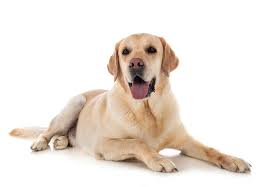

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
DOG


In [50]:
input_image_path = input('Path of the image to be predicted ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/225

input_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(input_reshaped)

input_pred_label = np.argmax(input_prediction) # to confidence values of both labels me se max will be picked

if(input_pred_label == 0) : print("CAT\n")
else : print("DOG")

# download images from internet and do the predictions

Path of the image to be predicted /content/cat.png


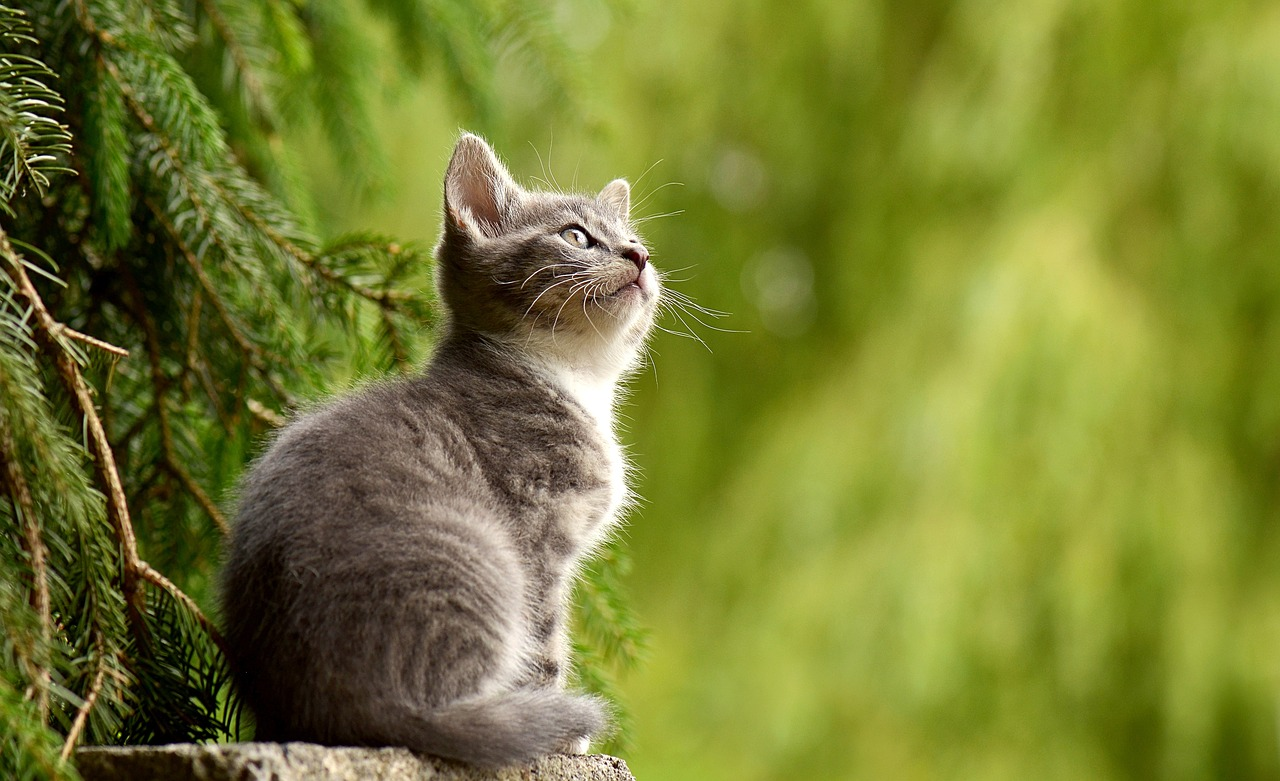

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
CAT



In [48]:
input_image_path = input('Path of the image to be predicted ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(224,224))

input_image_scaled = input_image_resize/225

input_reshaped = np.reshape(input_image_scaled,[1,224,224,3])

input_prediction = model.predict(input_reshaped)

input_pred_label = np.argmax(input_prediction)

if(input_pred_label == 0) : print("CAT\n")
else : print("DOG")

# download images from internet and do the predictions

# kaisi bhi image inteernet se download krlo, chalega, we are doing resize and reshape and rgp conversion, so model ko sahi cheej hi milegi

**Dense layer takes input as 1D vector. Convolution & pooling layers will give output as 4D arrays. So before processing the outputs of the convolution/pooling layers to dense(feed-forward) layers, we need to flatten it. Flatten means converting it to 1D vectors. All the images of suppose size 28 x 28 will be converted to 1D vector of size 784 containing all the pixel values. This will be input to the dense layers.**

**Feed-forward(dense) layers ka natures hi 1D vector ko input lene ka hota hai.Also STARTING ME INPUT ARRAY/LIST ME JITNE BHI NODES ELEMENTS HAIN, VE SARE HI INPUT LAYER ME AS NODES KAM KRTE HAIN.**

**So suppose input image list me 784 pixels/values hain toh input layer me number of nodes will be 784**

**Most Important concept**
```
x = Dense(784, activation='relu')(x)
x = Dense(256, activation='relu')(x)  
x = Dense(128, activation='relu')(x)
.
.
.
outputs = Dense(2, activation='softmax')(x)
```
Of the first layer, all the 784 nodes will be connected to all the 256 nodes of the 2nd dense layers. From first dense layer(784 nodes) to 2nd dense layer(256 nodes) tk jana, is known as feature extraction. So 784 festures se model ne 256 most important features ko extract kr liya 2nd layer pr pahunchkar.

Then all the 256 nodes will be connected to all the 128 nodes of the 3rd dense layer. Moving from 2nd to 3rd layer will cause further features extraction from 256 to 128 only.

Isi tarah chalte chalte..... features extract hote hote last me jakar keval 2 nodes bachenge. And we will get the prediction probabilities as the two nodes in the last layer(output layer).

**Testing to use the same model in the sequential manner**

**1. Sequential form 1**

In [71]:
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Define the input shape
input_shape = (224, 224, 3)

# Initialize Sequential model
model = Sequential()

# Load MobileNetV2 with pre-trained weights and exclude the top classification layer
model.add(MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape))

# Add Convolutional and MaxPooling layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))  # First Conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # First MaxPooling layer

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))  # Second Conv layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # Second MaxPooling layer

# Flatten the output before passing to Dense layers
model.add(Flatten())

# Continue with Dense layers
model.add(Dense(256, activation='relu'))  # First Dense layer
model.add(Dense(128, activation='relu'))  # Second Dense layer
model.add(Dense(64, activation='relu'))   # Third Dense layer

# Final Dense layer for binary classification with softmax activation
model.add(Dense(2, activation='softmax'))  # Output layer

## Complile the model before trying to get its summary, (in sequential archetecture)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=2)
# Default batch size used always is 32, so 1600 test images / 32 = 50 batches in each epoch of model training.

# Print the model summary : only after compiling and fitting in sequnetial models, you can view summary.
model.summary()


Epoch 1/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 403s 7s/step - accuracy: 0.8092 - loss: 0.4369
Epoch 2/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 386s 7s/step - accuracy: 0.9433 - loss: 0.1568


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (32, 7, 7, 1280)            │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (32, 7, 7, 64)              │         737,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (32, 3, 3, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (32, 3, 3, 128)             │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (32, 1, 1, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (32, 128)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (32, 256)                   │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (32, 128)                   │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (32, 64)                    │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (32, 2)                     │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,362,248 (35.71 MB)

 Trainable params: 3,109,378 (11.86 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 6,218,758 (23.72 MB)

In [72]:
score, acc = model.evaluate(x_test_scaled,y_test)
print("Test Loss ",score)
print("Test Accuracy ",acc)

# almost 97% accuracy on test images prediction : so good

13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6245 - loss: 4.7295
Test Loss  5.298893928527832
Test Accuracy  0.5950000286102295


**2. Sequential form 2**

In [65]:
from keras.applications import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Sequential

# Define the model
model = Sequential([
    MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),  # Pre-trained MobileNetV2
    GlobalAveragePooling2D(),  # Reduce spatial dimensions to 1D
    Dense(256, activation='relu'),  # First Dense layer
    Dense(128, activation='relu'),  # Second Dense layer
    Dense(64, activation='relu'),   # Third Dense layer
    Dense(2, activation='softmax')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [67]:
model.summary() ## model.sumaary working after compiling, in case of using sequential.

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (32, 7, 7, 1280)            │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_10          │ (32, 1280)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (32, 256)                   │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (32, 128)                   │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (32, 64)                    │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (32, 2)                     │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,813,384 (29.81 MB)

 Trainable params: 2,593,090 (9.89 MB)

 Non-trainable params: 34,112 (133.25 KB)

 Optimizer params: 5,186,182 (19.78 MB)

In [66]:
model.fit(x_train_scaled, y_train, epochs=2)
# Default batch size used always is 32, so 1600 test images / 32 = 50 batches in each epoch of model training.

Epoch 1/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 384s 7s/step - accuracy: 0.8700 - loss: 0.2667
Epoch 2/2
50/50 ━━━━━━━━━━━━━━━━━━━━ 342s 7s/step - accuracy: 0.9423 - loss: 0.1384


In [68]:
score, acc = model.evaluate(x_test_scaled,y_test)
print("Test Loss ",score)
print("Test Accuracy ",acc)

# almost 97% accuracy on test images prediction : so good

13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.7681 - loss: 4.0060
Test Loss  4.30839729309082
Test Accuracy  0.7524999976158142


In [73]:
import tensorflow as tf
import tensorflow_hub as hub
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Sequential

# Define the model
model = Sequential([
    # Load MobileNetV2 from TensorFlow Hub
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4',
                   input_shape=(224, 224, 3), trainable=False),  # Pre-trained MobileNetV2

    GlobalAveragePooling2D(),  # Reduce spatial dimensions to 1D
    Dense(256, activation='relu'),  # First Dense layer
    Dense(128, activation='relu'),  # Second Dense layer
    Dense(64, activation='relu'),   # Third Dense layer
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7d73950abb50> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

**The error occurs because hub.KerasLayer from TensorFlow Hub is not compatible with keras.Sequential. Instead of using Sequential, you can use the Functional API in Keras, which works well with hub.KerasLayer**

**Only instances of `keras.Layer` can be added to a Sequential model** Remeber this